In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 22})
sns.set_style("whitegrid")
import matplotlib.ticker as mtick

In [2]:
import tikzplotlib

In [3]:
df = pd.read_clipboard()
df.columns = ['model', 'p_data', 'AUROC', 'AUROC_std', 'AUPRC', 'AUPRC_std']
df.to_csv('/Users/andre/Documents/UCL/DoctorSignature/data/processed/ablation_results.csv')
df = pd.read_csv('/Users/andre/Documents/UCL/DoctorSignature/data/processed/ablation_results.csv')

In [26]:
df = df[df.p_data <0.8]

In [4]:
df.model = df.model.replace({'SIG': 'LS+LL+ATD'})
df.model = df.model.replace({'GRU': 'GRU+ATD'})

In [5]:
df

,Unnamed: 0,model,p_data,AUROC,AUROC_std,AUPRC,AUPRC_std
0,0,LS+LL+ATD,0.025,0.597,0.093,0.187,0.065
1,1,LS+LL+ATD,0.050,0.638,0.035,0.224,0.073
2,2,LS+LL+ATD,0.100,0.690,0.045,0.231,0.035
3,3,LS+LL+ATD,0.150,0.703,0.037,0.247,0.055
4,4,LS+LL+ATD,0.200,0.703,0.011,0.283,0.024
5,5,LS+LL+ATD,0.300,0.704,0.013,0.283,0.026
6,6,LS+LL+ATD,0.400,0.716,0.011,0.299,0.012
7,7,LS+LL+ATD,0.600,0.708,0.008,0.295,0.014
8,8,LS+LL+ATD,0.800,0.721,0.012,0.310,0.012
9,9,LS+LL+ATD,1.000,0.723,0.008,0.304,0.009


<IPython.core.display.Javascript object>


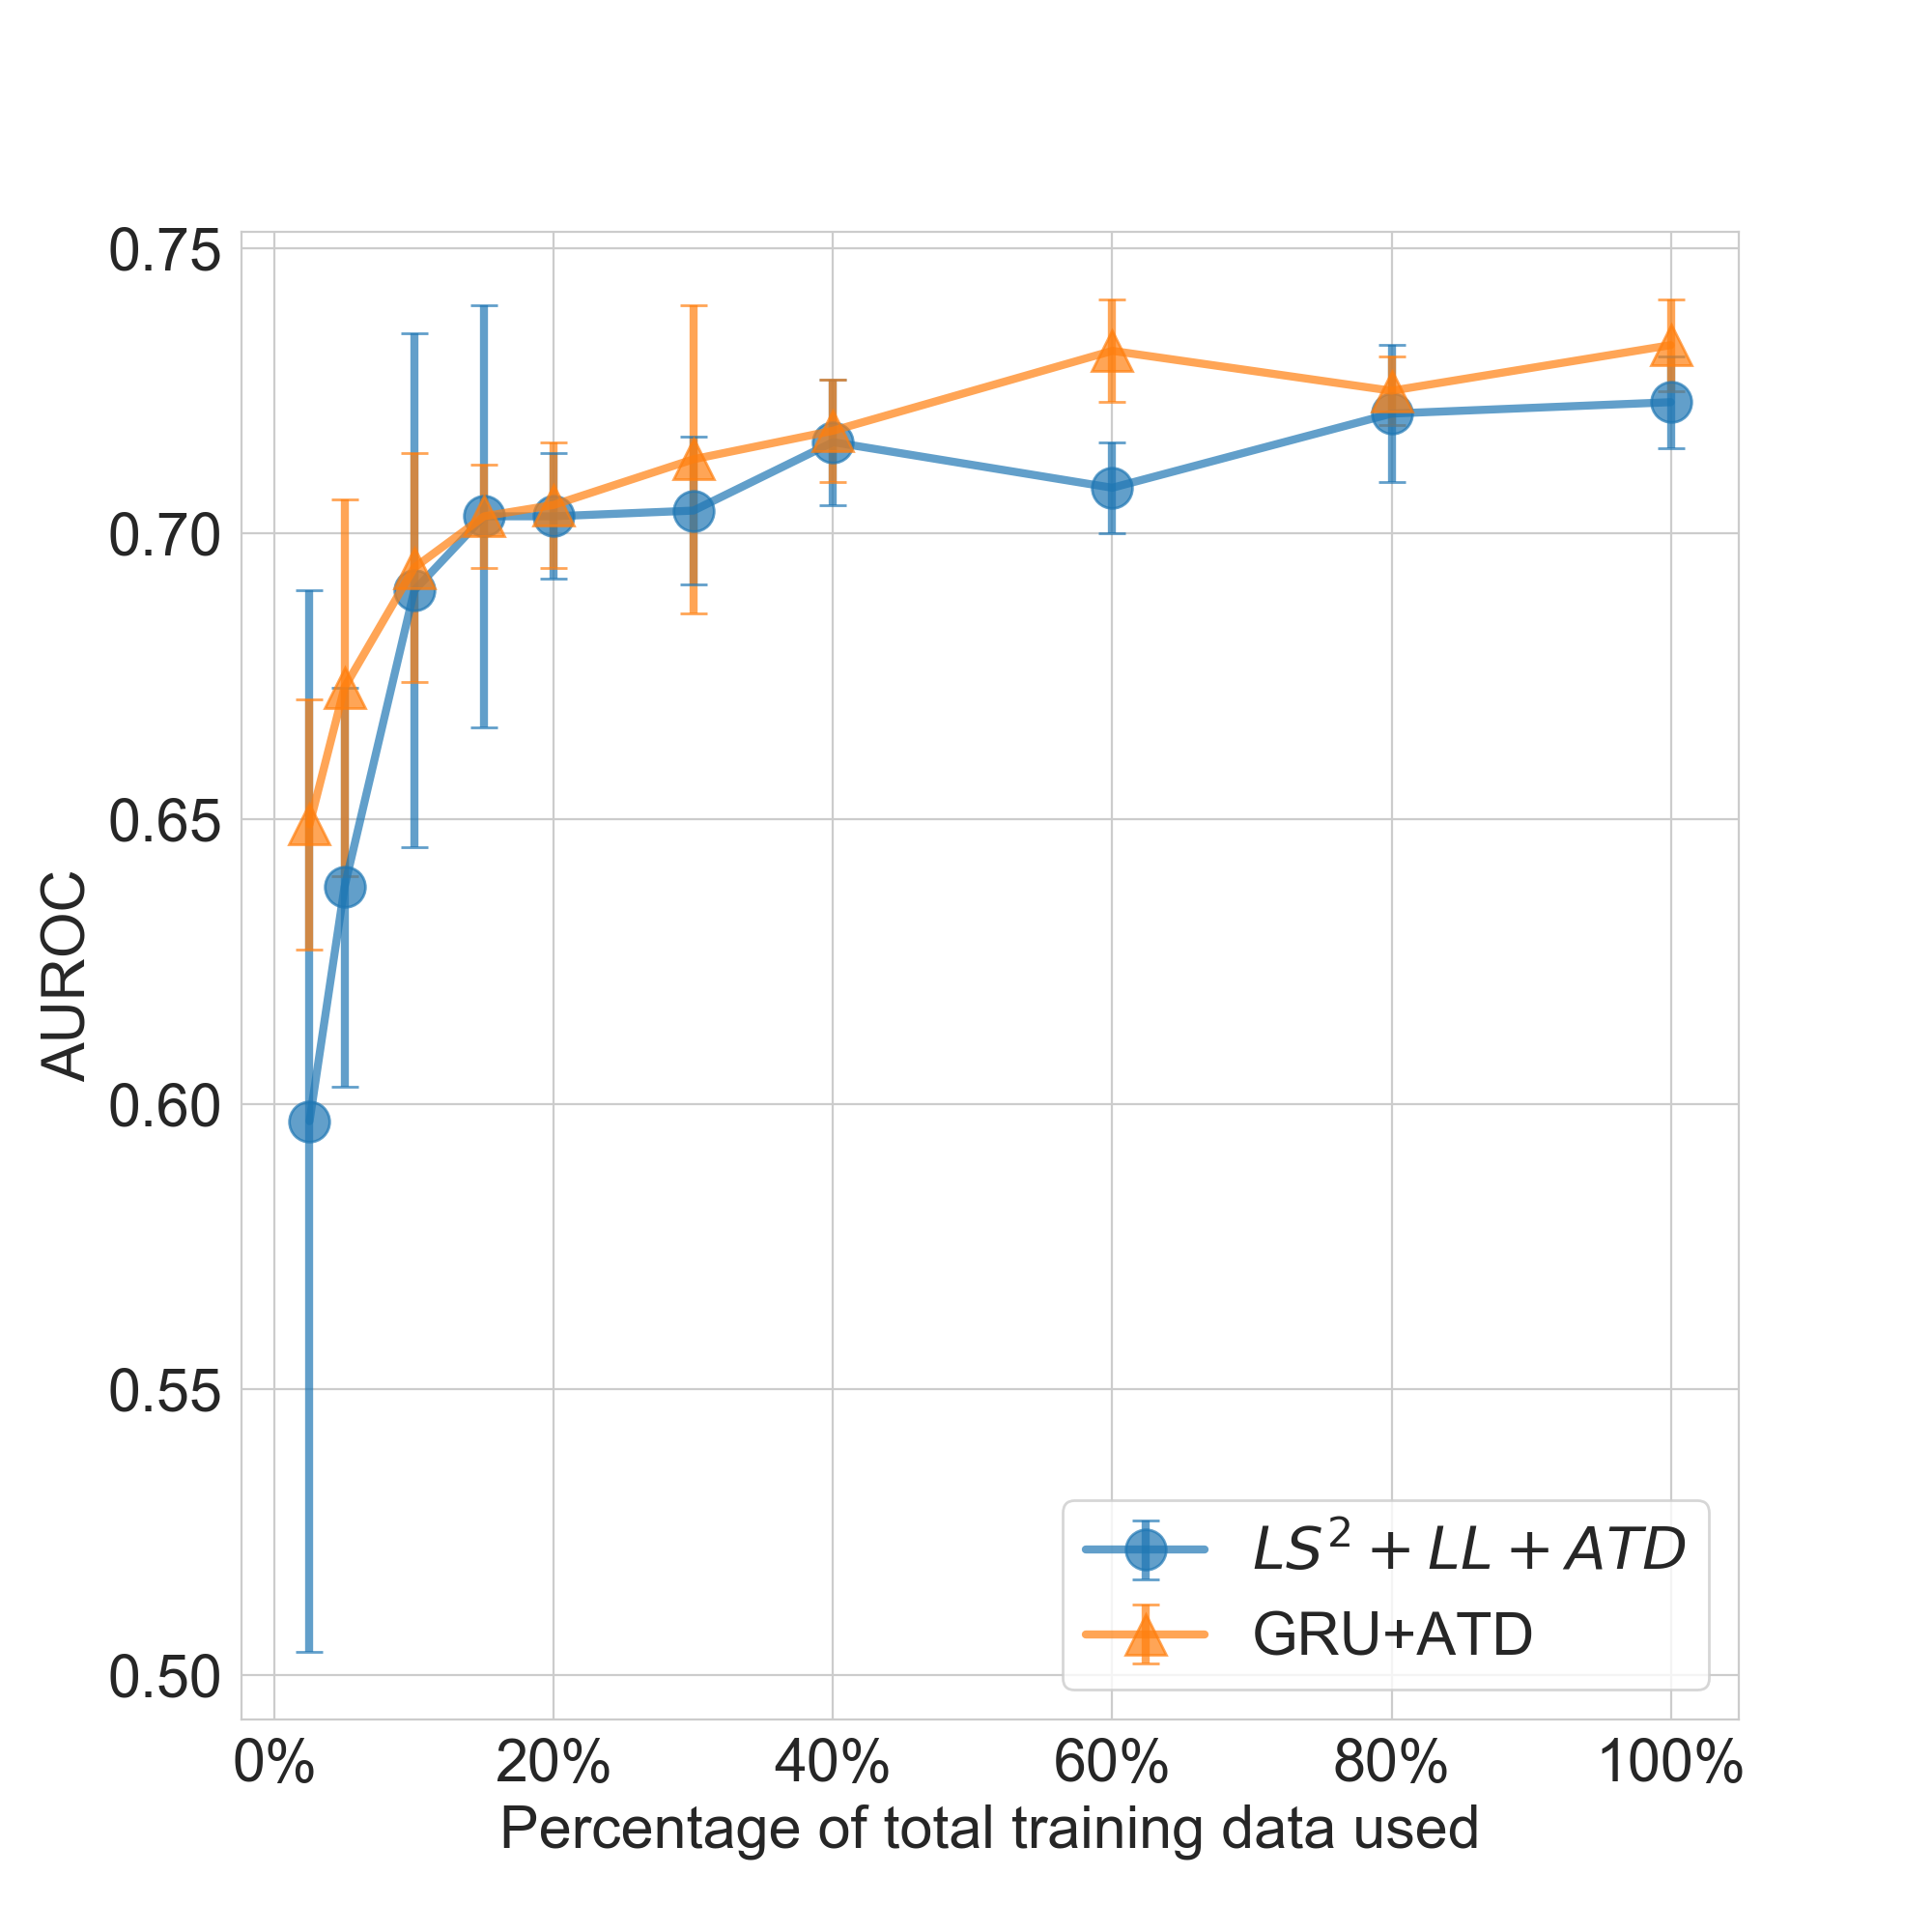

In [16]:
%matplotlib notebook
df_p = df[df.model == 'LS+LL+ATD']
fig, ax = plt.subplots(figsize=(10,10))
plt.errorbar(df_p.p_data*100, df_p.AUROC, yerr=df_p.AUROC_std, label='$LS^2+LL+ATD$', marker='o', alpha=0.7,linewidth=3, markersize=15, capsize=5)
df_p = df[df.model == 'GRU+ATD']
plt.errorbar(df_p.p_data *100, df_p.AUROC, yerr=df_p.AUROC_std, label='GRU+ATD', marker='^', alpha=0.7,linewidth=3,markersize=15, capsize=5)
ax.set_xlabel('Percentage of total training data used')
ax.set_ylabel('AUROC')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc='lower right')

<IPython.core.display.Javascript object>


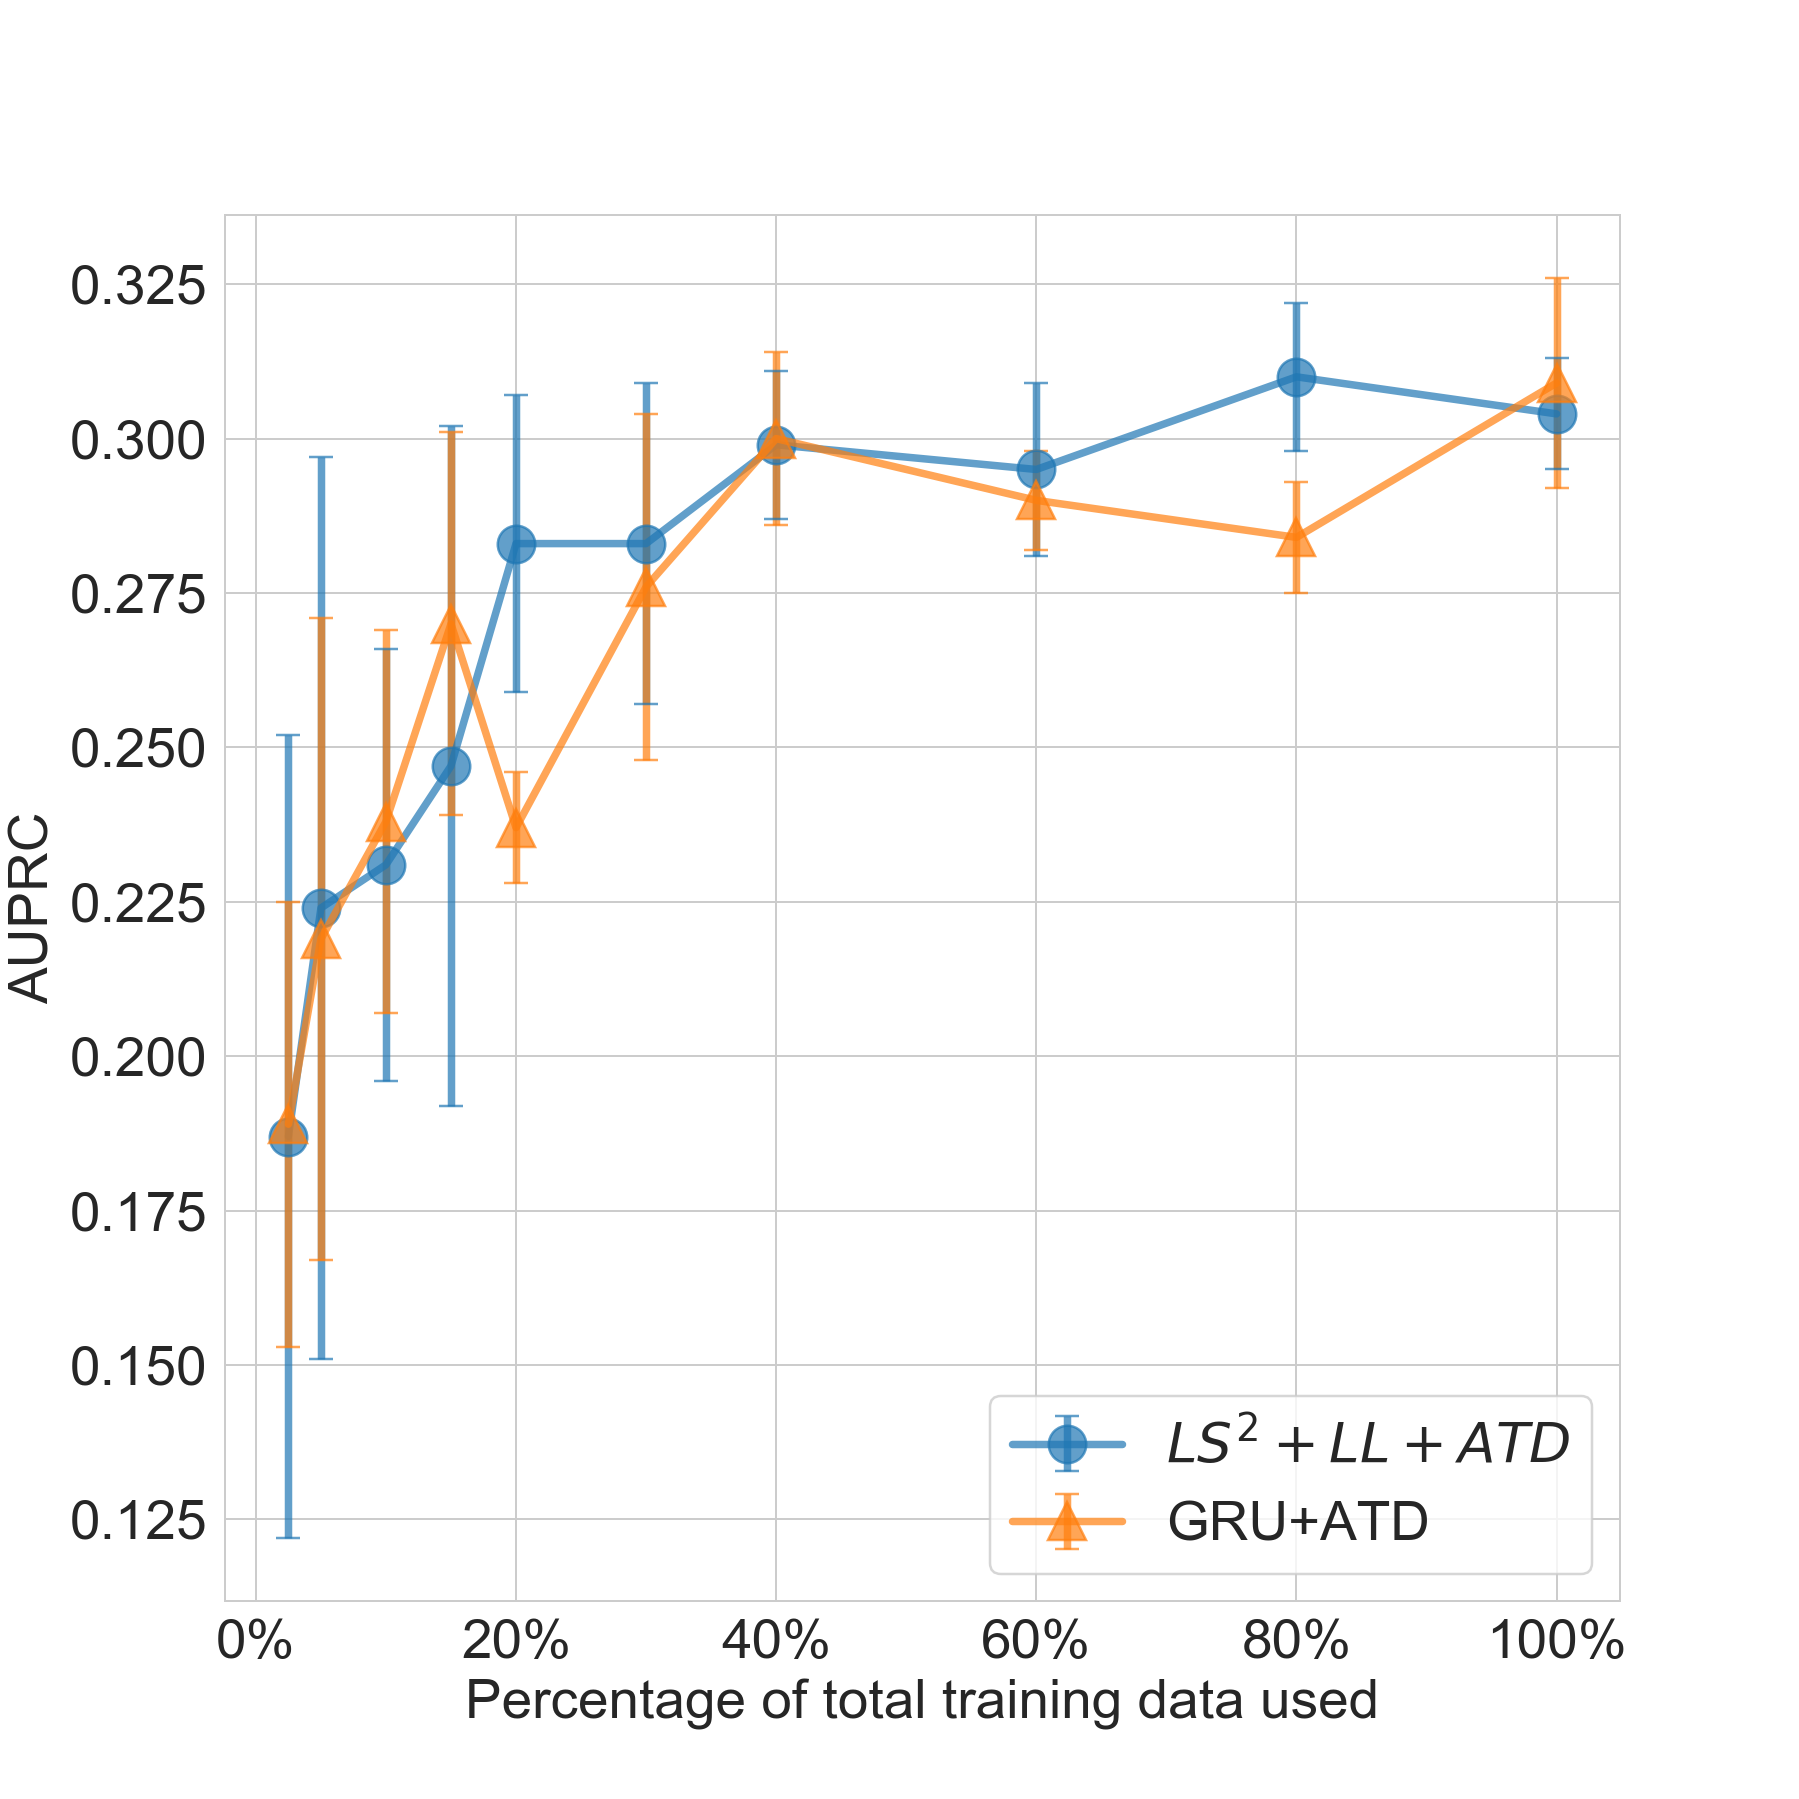

In [17]:
%matplotlib notebook
df_p = df[df.model == 'LS+LL+ATD']
fig, ax = plt.subplots(figsize=(10,10))
plt.errorbar(df_p.p_data*100, df_p.AUPRC, yerr=df_p.AUPRC_std, label='$LS^2+LL+ATD$', marker='o', alpha=0.7,linewidth=3, markersize=15, capsize=5)
df_p = df[df.model == 'GRU+ATD']
plt.errorbar(df_p.p_data *100, df_p.AUPRC, yerr=df_p.AUPRC_std, label='GRU+ATD', marker='^', alpha=0.7,linewidth=3,markersize=15, capsize=5)
ax.set_xlabel('Percentage of total training data used')
ax.set_ylabel('AUPRC')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc='lower right')
pl.

In [7]:
help(tikzplotlib)

Help on package tikzplotlib:

NAME
    tikzplotlib - Script to convert Matplotlib generated figures into TikZ/PGFPlots figures.

PACKAGE CONTENTS
    __about__
    _axes
    _cleanfigure
    _color
    _files
    _hatches
    _image
    _legend
    _line2d
    _markers
    _patch
    _path
    _quadmesh
    _save
    _text
    _util

CLASSES
    enum.Enum(builtins.object)
        tikzplotlib._save.Flavors
    
    class Flavors(enum.Enum)
     |  Flavors(value, names=None, *, module=None, qualname=None, type=None, start=1)
     |  
     |  An enumeration.
     |  
     |  Method resolution order:
     |      Flavors
     |      enum.Enum
     |      builtins.object
     |  
     |  Data and other attributes defined here:
     |  
     |  context = <Flavors.context: ('\\start{}', '\\stop{}', 'tex...panded\\d...
     |  
     |  latex = <Flavors.latex: ('\\begin{{{}}}', '\\end{{{}}}',...{tikzlibs}}...
     |  
     |  ----------------------------------------------------------------------

<Figure size 432x288 with 0 Axes>

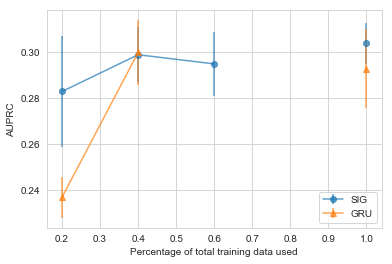

In [35]:
df_p = df[df.model == 'SIG']
fig, ax = plt.subplots()
plt.errorbar(df_p.p_data, df_p.AUPRC, yerr=df_p.AUPRC_std, label='SIG', marker='o', alpha=0.7)
df_p = df[df.model == 'GRU']
plt.errorbar(df_p.p_data, df_p.AUPRC, yerr=df_p.AUPRC_std, label='GRU', marker='^', alpha=0.7)
ax.set_xlabel('Percentage of total training data used')
ax.set_ylabel('AUPRC')
plt.legend(loc='lower right')